# Network Analysis in Python (Part 1)

## [DataCamp Course Description](https://www.datacamp.com/courses/network-analysis-in-python-part-1)

### Datasets: [Twitter network](https://assets.datacamp.com/production/course_1822/datasets/ego-twitter.p) [GitHub users](https://assets.datacamp.com/production/course_1822/datasets/github_users.p)

# Networks
- Insights into your network data
    - Important entities: influencers in a social network for example
    - Pathfinding: most efficient transportation path
    - Clustering: finding communities
    
# Network structure
- **Nodes** and **Edges**
![nodes](http://mathworld.wolfram.com/images/eps-gif/GraphNodesEdges_1000.gif)
- Together, nodes and edges make a **Graph**

# NetworkX API basics

The `.nodes()` method shows us the nodes that are present in the graph.

In [2]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1,2,3])
G.nodes()

NodeView((1, 2, 3))

Adding an edge between the nodes 1 and 2 `.add_edge()`, we can use the `.edges()` method to return a list of tuples which represent the edges. Each tuple shows the nodes that are present on that edge.

In [3]:
G.add_edge(1,2)

In [4]:
G.edges()

EdgeView([(1, 2)])

Metadata can be stored on the graph as well.

In [5]:
G.node[1]['label'] = 'blue'
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

Output a **node link diagram rendering** of the graph

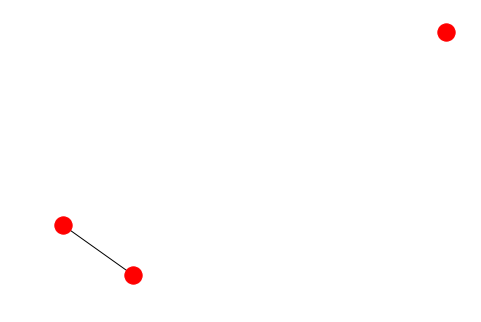

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

nx.draw(G)

plt.show()

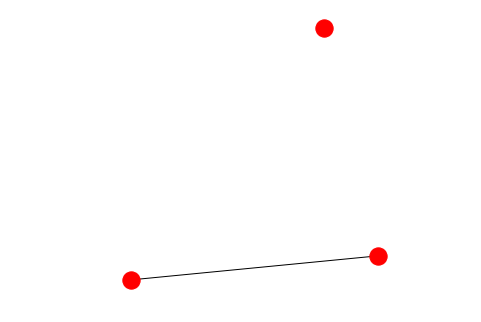

In [9]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Draw the graph to screen
nx.draw(G)

plt.show()

`[` _output expression_ `for` _iterator variable_ `in` _iterable_ `if` _predicate expression_ `]`

In [10]:
import pickle

In [11]:
nx.__version__

'2.1'

In [12]:
import matplotlib
matplotlib.__version__

'2.2.2'

In [14]:
T = nx.read_gpickle('ego-twitter.p')

EOFError: Ran out of input

In [ ]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]

print(noi, eoi)

# Types of Graphs

## Undirected graphs
- There is no inherent direction with the association
- Facebook social graph

```python
import networkx as nx
G = nx.Graph()
type(G)
```

`networkx.classes.graph.Graph`

## Directed graphs
- There is an inherent direction with the association
- Twitter social graph (You may follow without a follow back)

```python
D = nx.DiGraph()
type(D)
```

`networkx.classes.digraph.DiGraph`

## Multi(Di)Graph
- Multiple edges between the nodes
- Trip records between bike sharing stations

```python
M = nx.MultiGraph()

type(M)
```

`networkx.classes.multigraph.MultiGraph`

```python
MD = nx.MultiDiGraph()

type(MD)
```

`networkx.classes.multidigraph.MultiDiGraph`

# Weights on graphs
- If we want to collapse many edges into one weighted edge

# Self-loops
- Nodes that are connected to themselves

In [ ]:
# Set the weight of the edge
T.edge[1][10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:
    
        # Set the weight to 1.1
        T.edge[u][v]['weight'] = 1.1

You'll find the `assert` statement useful. An `assert`-ions checks whether the statement placed after it evaluates to `True`, otherwise it will return an `AssertionError`.

In [ ]:
T.number_of_selfloops() #42

# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []
    
    # Iterate over all the edges of G
    for u, v in G.edges():
    
    # Check if node u and node v are the same
        if u == v:
        
            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)
            
    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

# Irrational vs. Rational visualizations

## Visualizing networks
- Matrix plots
- Arc plots
- Circos plots

# Matrix plots
- Nodes are the rows and columns of a matrix
- The cells are filled in if an edge exists between the pair of nodes
- In an undirected graph the graph is symmetrical across the diagonal
- In Directed matrices the graph is not necessarily symmetrical
- **If the nodes are ordered along the rows and columns—such that the neighbours are listed close to one another—then a matrix plot can be used to visualize clusters or communities of nodes.**

# Arc plots
- If properly ordered along the horizontal, these plots can visualize the realationship between connectivity and the sorted or grouped property.
- Arc plots are a good starting point for visualization because it forms the basis for further analysis.

# Circos plot
- An esstetic version of the Arc plot where the ends of the horizontal Arc plot are connected into a circle.

```python
import nxviz as nv
import matplotlib.pyplot as plt
ap = nv.ArcPlot(G)
ap.draw()
plt.show()
```

In [ ]:
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(T, node_order='category', node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()

# Degree centality
- Which nodes are important?
    - Degree centrality
    - Betweenness centrality
    
## Degree centrality

# $$\frac{\text{Number of Neighbours I Have}}{\text{Number of Neighbours I Could Possibly Have}}$$

- Example of nodes with high degree centrality
    - Twitter broadcasters
    - Airport transportations hubs
    - Disease super-spreaders

In [ ]:
import numpy as np
G.add_nodes_from(np.arange(1, 10))

In [ ]:
for e in np.arange(2, 10):
    G.add_edge(1,e)

In [ ]:
G.edges()

In [ ]:
list(G.neighbors(1))

In [ ]:
list(G.neighbors(8))

In the `degree_centrality()` function, self-loops are not included.

In [ ]:
nx.degree_centrality(G)

In [ ]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()
    
    # Iterate over all nodes in G
    for n in G.nodes():
    
        # Check if the number of neighbors of n matches m
        if len(G.neighbors(n)) == m:
        
            # Add the node n to the set
            nodes.add(n)
            
    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)

In [ ]:
# Compute the degree of every node: degrees
degrees = [len(T.neighbors(n)) for n in T.nodes()]

# Print the degrees
print(degrees)

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

# Graph algorithms

## Pathfinding
- Finding paths
    - Optimization: eg. shortest tansportation paths
    - Modeling: eg. disease spread, information passing

# Breadth-first search (BFS)
- Example: Shortest path between two nodes

In [ ]:
# Define path_exists()
def path_exists(G,node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    
    # Initialize the queue of cells to visit with the first node: queue
    queue = [node1] 
    
    # Iterate over the nodes in the queue
    for node in queue:
    
        # Get neighbors of the node
        neighbors = G.neighbors(node) 
        
        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

In [ ]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break
        
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)
            
            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])

In [ ]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
        
        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

# Betweenness centrality

## All shortest paths
- Set of paths
- Each path is shortest path between a given pair of nodes
- Done for all node pairs

# Definition: 

# $$\frac{\text{num. shortest paths through node}}{\text{all possible shortest paths}}$$

- Captures bottlenecked nodes rather than highly connected nodes.

# Application:
- Bridges between liberal- and conservative- leaning Twitter users
- Critical information transfer links in the Internet

In [ ]:
import networkx as nx
G = nx.barbell_graph(m1=5, m2=1)

nx.betweenness_centrality(G)

In [ ]:
nx.draw(G)
plt.show()

In [ ]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show()

In [ ]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    
    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))
    
    nodes = set()
    
    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():
    
        # Check if the current value has the maximum degree centrality
        if v == max_dc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes
    
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())

In [ ]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)
    
    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))
    
    nodes = set()
    
    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():
    
        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(T)[node] == max(nx.betweenness_centrality(T).values())

# Cliques and communities
- Social cliques: tightly-knit groups
- Network cliques: completely connected graphs

- Simplest definition of a clique is an edge
- Simplest complex clique: a triangle

# Triangle applications
- Friend recommendation systems

# Clique code
```python
from itertools import combinations

for n1, n2 in combination(G.nodes(), 2):
    print(n1, n2)
```

In [ ]:
from itertools import combinations

# Define is_in_triangle() 
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not. 
    
    Returns a boolean.
    """
    in_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

In [ ]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):
        
            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)
            
            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)
            
    return triangle_nodes
    
# Write the assertion statement
assert len(nodes_in_triangle(T, 1)) == 35

In [ ]:
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):
        
            in_open_triangle = True
            
            break
            
    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):
    
        # Increment num_open_triangles
        num_open_triangles += 1
        
print(num_open_triangles)

# Maximal Cliques
- Definition: a clique that, when extended by one node is no longer a clique.
- Applications: community finding

# Communities
- Find cliques
- Find unions of cliques
    - One naive way of identifying communities would be to find these unions of maximal cliques that share some number of members but are also part of some minimum size.
- find_cliques finds all **maximal** cliques

```python
import networkx as nx
G = nx.barbell_graph(m1=5, m2=1)
nx.find_cliques(G)

list(nx.find_cliques(G))
```

In [ ]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(T, 3)) == 33

# Subgraphs
- Visualize portions of a large graph
    - Paths
    - Communities/cliques
    - Degrees of separation from a node

In [ ]:
import networkx as nx
G = nx.erdos_renyi_graph(n=20, p=0.3)

G.nodes()

In [ ]:
nodes = G.neighbors(8)

In [ ]:
nodes = list(nodes)
nodes

In [ ]:
nodes.append(8)

In [ ]:
G_eight = G.subgraph(nodes)

In [ ]:
G_eight.edges()

In [ ]:
G_eight

In [ ]:
G

In [ ]:
nx.draw(G_eight, with_labels=True)

In [ ]:
nodes_of_interest = [29, 38, 42]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []
    
    # Iterate over the nodes of interest
    for n in nodes_of_interest:
    
        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)
        
        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):
        
            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)
            
    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw)
plt.show()

In [ ]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T.neighbors(n)
    
    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)
plt.show()

# Case Study
## Github user collaboration network
- Nodes: users
- Edges: collaboration on same GitHub repository
- Goals:
    - Analyze structure
    - Vixualize
    - Build simple recommendation system

# Review of simple functions

In [ ]:
import networkx as nx
G = nx.erdos_renyi_graph(n=20, p=0.2)
len(G.edges())

In [ ]:
len(G.nodes())

In [ ]:
nx.degree_centrality(G)

In [ ]:
nx.betweenness_centrality(G)

In [ ]:
print(nx.__version__)    # DataCamp version 11/2018 -- 1.11

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx 

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()

# Case Study
## Visualizations
### nxviz API Example:

In [ ]:
import networkx as nx
import nxviz as nv
G = nx.erdos_renyi_graph(n=20, p=0.3)
circ = nv.CircosPlot(G)    # node_color='key', node_group='key'
circ.draw()

# Connected component subgraph

In [ ]:
import networkx as nx
G = nx.erdos_renyi_graph(n=100, p=0.03)
nx.connected_component_subgraphs(G)

In [ ]:
list(nx.connected_component_subgraphs(G))

In [ ]:
for g in list(nx.connected_component_subgraphs(G)):
    print(len(g.nodes()))

In [ ]:
# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs, node_grouping='grouping')

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

In [ ]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)
    
# Create the ArcPlot object: a
a = ArcPlot(graph=G, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [ ]:
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt 
 
# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)

# Create the CircosPlot object: c
c = CircosPlot(graph=G, node_order='degree', node_grouping='grouping', node_color='grouping')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

# Cliques

In [ ]:
import networkx as nx
G = nx.erdos_renyi_graph(n=100, p=0.15)
nx.find_cliques(G)

In [ ]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

In [ ]:
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(graph=G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

# Final Tasks

- Find important users
    - degree_centrality
- Find largest communities of collaborators
    - maximal clique
- Build a collaboration recommendation system
    - open triangles

In [ ]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(list(deg_cent.values()))

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if n == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

In [ ]:
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt
 
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique)

# Go out 1 degree of separation
for node in G_lmc.nodes():
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(G.neighbors(node)), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]
        
# Create the ArcPlot object: a
a = ArcPlot(graph=G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [ ]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


# Network Analysis in Python (Part 2)
## [DataCamp Link](https://www.datacamp.com/courses/network-analysis-in-python-part-2)

In [ ]:
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(G)
for n in G.nodes():
    G.node[n]['centrality'] = dcs[n]

In [ ]:
# Create the CircosPlot object: c
c = CircosPlot(G, node_color='bipartite', node_grouping='bipartite', node_order='centrality')

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

# Bipartite Graphs
- A graph that is partitioned into two sets
- Nodes are only connected to nodes in other partitions
- Contrast: "unipartite"

In [ ]:
import networkx as nx
G = nx.Graph()
numbers = range(3)
G.add_nodes_from(numbers, bipartite='customers')
letters = ['a', 'b']
G.add_nodes_from(letters, bipartite='products')

In [ ]:
G.nodes(data=True)

# Filtering graphs

In [ ]:
cust_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'customers']

cust_nodes

In [ ]:
nx.bipartite.degree_centrality(G, cust_nodes)

In [ ]:
# Define get_nodes_from_partition()
def get_nodes_from_partition(G, partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.node[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
             nodes.append(n)
    return nodes

# Print the number of nodes in the 'projects' partition
print(len(get_nodes_from_partition(G, 'projects')))

# Print the number of nodes in the 'users' partition
print(len(get_nodes_from_partition(G, 'users')))

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(G, 'users')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(user_dcs, bins=20)
plt.show()

In [ ]:
# Get the 'projects' nodes: project_nodes
project_nodes = get_nodes_from_partition(G, 'projects')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for project_nodes: project_dcs
project_dcs = [dcs[n] for n in project_nodes]

# Plot the degree distribution of project_dcs
plt.yscale('log')
plt.hist(project_dcs, bins=20)
plt.show()

# Bipartite graphs and recommendation systems
- Previously: Recommended users to connect with one another
- Graph: "unipartite" or (user-only) version
- Now: "bipartite" or (repo-users) version
- Recommending repositories for users to work on

# Code: Node sets
```python
user1_nbrs = G.neighbors('user1')

user3_nbrs = G.neighbors('user3')

set(user1_nbrs).intersection(user3_nbrs)

set(user3_nbrs).difference(user1_nbrs)
```

In [ ]:
def shared_partition_nodes(G, node1, node2):
    # Check that the nodes belong to the same partition
    assert G.node[node1]['bipartite'] == G.node[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

# Print the number of shared repositories between users 'u7909' and 'u2148'
print(len(shared_partition_nodes(G, 'u7909', 'u2148')))

In [ ]:
def user_similarity(G, user1, user2, proj_nodes):
    # Check that the nodes belong to the 'users' partition
    assert G.node[user1]['bipartite'] == 'users'
    assert G.node[user2]['bipartite'] == 'users'

    # Get the set of nodes shared between the two users
    shared_nodes = shared_partition_nodes(G, user1, user2)

    # Return the fraction of nodes in the projects partition
    return len(shared_nodes) / len(proj_nodes)

# Compute the similarity score between users 'u4560' and 'u1880'
project_nodes = get_nodes_from_partition(G, 'projects')
similarity_score = user_similarity(G, 'u4560', 'u1880', project_nodes)

print(similarity_score)

In [ ]:
from collections import defaultdict

def most_similar_users(G, user, user_nodes, proj_nodes):
    # Data checks
    assert G.node[user]['bipartite'] == 'users'

    # Get other nodes from user partition
    user_nodes = set(user_nodes)
    user_nodes.remove(user)

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, user, n, proj_nodes)
        similarities[similarity].append(n)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of users that share maximal similarity
    return similarities[max_similarity]

user_nodes = get_nodes_from_partition(G, 'users')
project_nodes = get_nodes_from_partition(G, 'projects')

print(most_similar_users(G, 'u4560', user_nodes, project_nodes))

In [ ]:
def recommend_repositories(G, from_user, to_user):
    # Get the set of repositories that from_user has contributed to
    from_repos = set(G.neighbors(from_user))
    # Get the set of repositories that to_user has contributed to
    to_repos = set(G.neighbors(to_user))

    # Identify repositories that the from_user is connected to that the to_user is not connected to
    return from_repos.difference(to_repos)

# Print the repositories to be recommended
print(recommend_repositories(G, 'u7909', 'u2148'))

# Concept of Projection
## When dealing with a bipartite graph
- Useful to investigate the relationships between nodes on one partition
    - Conditioned on the connections to the nodes in the other partition
# Projection
- Unipartite representation of bipartite connectivity

# Bipartite projection
```python
G.nodes()

G.edges()

cust_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'customers']

cust_nodes
```

 List comprehensions can include conditions, so if you want to filter a graph for a certain type of node, you can do: 
 ```python
 [n for n, d in G.nodes(data=True) if d['key'] == 'some_value']
 ```

In [ ]:
import matplotlib.pyplot as plt 

# Plot the degree centrality distribution of both node partitions from the original graph
plt.figure()
original_dc = nx.bipartite.degree_centrality(G, people)
plt.hist(list(original_dc.values()), alpha=0.5)
plt.yscale('log')
plt.title('Bipartite degree centrality')
plt.show()


# Plot the degree centrality distribution of the peopleG graph
plt.figure()  
people_dc = nx.degree_centrality(peopleG)
plt.hist(list(people_dc.values()))
plt.yscale('log')
plt.title('Degree centrality of people partition')
plt.show()

# Plot the degree centrality distribution of the clubsG graph
plt.figure() 
clubs_dc = nx.degree_centrality(clubsG)
plt.hist(list(clubs_dc.values()))
plt.yscale('log')
plt.title('Degree centrality of clubs partition')
plt.show()

# Bipartite graphs as matrices

```python
cust_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'customers']

prod_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'products']

mat = nx.bipartite.biadjacency_matrix(G, row_order=cust_nodes, column_order=prod_nodes)

mat
```

# Matrix multiplication in Python

```python
mat @ mat.T

mat.T @ mat
```

Bipartite graph adjacency matrices are often asymmetric. Bipartite graph adjacency matrices are often asymmetric because there are more ways to construct an asymmetric bipartite graph than a symmetric one.

In [ ]:
# Get the list of people and list of clubs from the graph: people_nodes, clubs_nodes
people_nodes = get_nodes_from_partition(G, 'people')
clubs_nodes = get_nodes_from_partition(G, 'clubs')

# Compute the biadjacency matrix: bi_matrix
bi_matrix = nx.bipartite.biadjacency_matrix(G, row_order=people_nodes, column_order=clubs_nodes)

# Compute the user-user projection: user_matrix
user_matrix = bi_matrix @ bi_matrix.T

print(user_matrix)

In [ ]:
import numpy as np

# Find out the names of people who were members of the most number of clubs
diag = user_matrix.diagonal()
indices = np.where(diag == diag.max())[0]  
print('Number of clubs: {0}'.format(diag.max()))
print('People with the most number of memberships:')
for i in indices:
    print('- {0}'.format(people_nodes[i]))

# Set the diagonal to zero and convert it to a coordinate matrix format
user_matrix.setdiag(0)
users_coo = user_matrix.tocoo()

# Find pairs of users who shared membership in the most number of clubs
indices = np.where(users_coo.data == users_coo.data.max())[0]
print('People with most number of shared memberships:')
for idx in indices:
    print('- {0}, {1}'.format(people_nodes[users_coo.row[idx]], people_nodes[users_coo.col[idx]])) 

# Representing network data with pandas
## CSV files for network data storage
- Advantages
    - Human-radable
    - Do further analysis with pandas
- Disadvantages
    - Repetitive; disk space
### We require:
- Two DataFrames: node and edge lists

# Node list
- Each row is one node
- The columns represent metadata attached to that node

# Edge list
- Each row is one edge
- The columns represent the metadata attached to that edge

# Pandas and graphs
```python
G.nodes(data=True)

nodelist = []

for n, d in G.nodes(data=True):
    node_data = dict()
    node_data['node'] = n
    node_data.update(d)
    nodelist.append(node_data)
    
nodelist

import pandas as pd
pd.DataFrame(nodelist)

pd.DataFrame(nodelist).to_csv('my_file.csv')
```

In [ ]:
# Initialize a list to store each edge as a record: nodelist
nodelist = []
for n, d in G_people.nodes(data=True):
    # nodeinfo stores one "record" of data as a dict
    nodeinfo = {'person': n} 
    
    # Update the nodeinfo dictionary 
    nodeinfo.update(d)
    
    # Append the nodeinfo to the node list
    nodelist.append(nodeinfo)
    

# Create a pandas DataFrame of the nodelist: node_df
node_df = pd.DataFrame(nodelist)
print(node_df.head())

In [ ]:
# Initialize a list to store each edge as a record: edgelist
edgelist = []
for n1, n2, d in G_people.edges(data=True):
    # Initialize a dictionary that shows edge information: edgeinfo
    edgeinfo = {'node1':n1, 'node2':n2}
    
    # Update the edgeinfo data with the edge metadata
    edgeinfo.update(d)
    
    # Append the edgeinfo to the edgelist
    edgelist.append(edgeinfo)
    
# Create a pandas DataFrame of the edgelist: edge_df
edge_df = pd.DataFrame(edgelist)
print(edge_df.head())

# Introduction to graph differences
## Time series analysis
- How some number changes as a function of time
    - Is there an upward or downward trend?
- Rate of change of things over a sliding window of time
- Examples:
    - Track weight over time
    - Track stock investment portfolio value over time
    
# Evolving graphs
- Graphs that change over time: communication networks
- Assumptions:
    - Edge changes over time; assume nodes stay constant
        - This becomes easier to analyze moving forward
    - Both edges and nodes change over time

# Graph differences
- Graphs are comprised of:
    - A node set
    - An edge set
- If a node set doesn't change:
    - Changing only the edge set will result in a change in the graph
- Analogy: set differences

```python
set(c1, c2, c3).difference(set(c2, c3, c4)) = set(c1)
set(c2, c3, c4).difference(set(c1, c2, c3)) = set(c4)
```

- In NetworkX: `.difference(G1, G2)` function
    - Assumes `G1` and `G2` have equal node sets

In [ ]:
import networkx as nx 

months = range(4, 11)

# Initialize an empty list: Gs
Gs = [] 
for month in months:
    # Instantiate a new undirected graph: G
    G = nx.Graph()
    
    # Add in all nodes that have ever shown up to the graph
    G.add_nodes_from(data['sender'])
    G.add_nodes_from(data['recipient'])
    
    # Filter the DataFrame so that there's only the given month
    df_filtered = data[data['month'] == month]
    
    # Add edges from filtered DataFrame
    G.add_edges_from(zip(df_filtered['sender'], df_filtered['recipient']))
    
    # Append G to the list of graphs
    Gs.append(G)
    
print(len(Gs))

In [ ]:
import networkx as nx  
# Instantiate a list of graphs that show edges added: added
added = []
# Instantiate a list of graphs that show edges removed: removed
removed = []
# Here's the fractional change over time
fractional_changes = []
window = 1  
i = 0      

for i in range(len(Gs) - window):
    g1 = Gs[i]
    g2 = Gs[i + window]
        
    # Compute graph difference here
    added.append(nx.difference(g2, g1))   
    removed.append(nx.difference(g1, g2))
    
    # Compute change in graph size over time
    fractional_changes.append((len(g2.edges()) - len(g1.edges())) / len(g1.edges()))
    
# Print the fractional change
print(fractional_changes)

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plot the number of edges added over time
edges_added = [len(g.edges()) for g in added]
plot1 = ax1.plot(edges_added, label='added', color='orange')

# Plot the number of edges removed over time
edges_removed = [len(g.edges()) for g in removed]
plot2 = ax1.plot(edges_removed, label='removed', color='purple')

# Set yscale to logarithmic scale
ax1.set_yscale('log')  
ax1.legend()

# 2nd axes shares x-axis with 1st axes object
ax2 = ax1.twinx()

# Plot the fractional changes over time
plot3 = ax2.plot(fractional_changes, label='fractional change', color='green')

# Here, we create a single legend for both plots
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)
plt.axhline(0, color='green', linestyle='--')
plt.show()

# Evolving graph statistics
## Graph summary statistics:
- Number of nodes
- Number of edges
- Degree distribution
- Centality distribution

- For simple metrics, use edgelist data
- For graph theoretic metrics, use graph object

# Cumulative distribution
- Compact way of representing the distribution of values

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()

# Create a list of the number of edges per month
edge_sizes = [len(g.edges()) for g in Gs]

# Plot edge sizes over time
plt.plot(edge_sizes)
plt.xlabel('Time elapsed from first month (in months).') 
plt.ylabel('Number of edges')                           
plt.show()

In [ ]:
# Import necessary modules
import networkx as nx
import matplotlib.pyplot as plt

# Create a list of degree centrality scores month-by-month
cents = []
for G in Gs:
    cent = nx.degree_centrality(G)
    cents.append(cent)


# Plot ECDFs over time
fig = plt.figure()
for i in range(len(cents)):
    x, y = ECDF(cents[i].values()) 
    plt.plot(x, y, label='Month {0}'.format(i+1)) 
plt.legend()   
plt.show()

# Zooming in and out: Overall graph summary

## Graph exploration at scales
- Exploration at global and local scales
- Global: Centrality distributions
- Local: Connectivity and structures

# Zooming on modes
- Isolate a given node or set of nodes
- Plot node statistics over time

# Summarizing evolving node statistics
- Customer-product dataset
    - Investigate how purchasing patterns have changed over time
- `customer1` - node of interest

```python
Gs = [....]
noi = 'customer1'
degs = []

for g in Gs:
    # Get the degree of the node
    degs.append(len(g.neighbors(noi)))
plt.plot(degs)

plt.show()
```

# Default dictionaries

```python
from collections import defaultdict
d = defaultdict(list)
d['heathrow'].append(0.31)
d['heathrow'].append(0.84)

d
```

In [ ]:
# Get the top 5 unique degree centrality scores: top_dcs
top_dcs = sorted(set(nx.degree_centrality(G).values()), reverse=True)[:5]

# Create list of nodes that have the top 5 highest overall degree centralities
top_connected = []
for n, dc in nx.degree_centrality(G).items():
    if dc in top_dcs:
        top_connected.append(n)
        
# Print the number of nodes that share the top 5 degree centrality scores
print(len(top_connected))

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
from collections import defaultdict

# Create a defaultdict in which the keys are nodes and the values are a list of connectivity scores over time
connectivity = defaultdict(list)
for n in top_connected:
    for g in Gs:
        connectivity[n].append(len(g.neighbors(n)))

# Plot the connectivity for each node
fig = plt.figure() 
for n, conn in connectivity.items(): 
    plt.plot(conn, label=n) 
plt.legend()  
plt.show()

# Introduction to the case study
## College forum posting dataset
- Node partitions: students, forums
- Activities in the chapter:
    - Constructing a graph from a pandas DataFrame
    - Computing unipartite projections of a bipartite graph
    - Visualization
    - Time series filtering & analysis
- Recap previously used functions

# Graphs from DataFrames
```python
df   # Our pandas DataFrame
G = nx.Graph()
G.add_nodes_from(df['products'], bipartite='products')
G.add_nodes_from(df['customers'], bipartite='customers')

G.nodes()

G.edges() # Just a sanity check to ensure the list is empty
```

# Import edges
```python
G.add_edges_from(zip(df['customers'], df['products']))

G.edges()
```

# Bipartite projections
```python
cust_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'customers']

prod_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'products']

prodG = nx.bipartite.projected_graph(G, nodes=prod_nodes)

custG = nx.bipartite.projected_graph(G, nodes=cust_nodes)

prodG.nodes()

custG.nodes() # Ensure the correct node partition
```

In [ ]:
import networkx as nx

# Instantiate a new Graph: G
G = nx.Graph()

# Add nodes from each of the partitions
G.add_nodes_from(data['student'], bipartite='student')
G.add_nodes_from(data['forum'], bipartite='forum')

# Add in each edge along with the date the edge was created
for r, d in data.iterrows():
    G.add_edge(d['student'], d['forum'], date=d['date'])

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Get the student partition's nodes: student_nodes
student_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'student']

# Create the students nodes projection as a graph: G_students
G_students = nx.bipartite.projected_graph(G, nodes=student_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_students)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log')  
plt.show()

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt 
import networkx as nx

# Get the forums partition's nodes: forum_nodes
forum_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'forum']

# Create the forum nodes projection as a graph: G_forum
G_forum = nx.bipartite.projected_graph(G, nodes=forum_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_forum)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log') 
plt.show()

# Time based filtering
- Filtering
- Datetime module
- Visualization

# Filtering edges
```python
[(u, v) for u, v, d in G.edges(data=True) if d['sale_count'] >= 10]
```

# Datetime

In [15]:
from datetime import datetime, timedelta
year = 2011
month = 11
day1 = 10
day2 = 6

date1 = datetime(year, month, day1)
date2 = datetime(year, month, day2)

date1 > date2

True

# Graph visualization
```python
from nxviz import CircosPlot

c = CircosPlot(G, node_grouping='bipartite', node_color='bipartite')

c.draw()

plt.show()
```

In [ ]:
import networkx as nx
from datetime import datetime

# Instantiate a new graph: G_sub
G_sub = nx.Graph()

# Add nodes from the original graph
G_sub.add_nodes_from(G.nodes(data=True))

# Add edges using a list comprehension with one conditional on the edge dates, that the date of the edge is earlier than 2004-05-16.
G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] < datetime(2004,5,16)])

In [ ]:
# Import necessary modules
from nxviz import CircosPlot
import networkx as nx
import matplotlib.pyplot as plt

# Compute degree centrality scores of each node
dcs = nx.bipartite.degree_centrality(G, nodes=forum_nodes)
for n, d in G_sub.nodes(data=True):
    G_sub.node[n]['dc'] = dcs[n]

# Create the CircosPlot object: c
c = CircosPlot(G_sub, node_grouping='bipartite', node_color='bipartite', node_order='dc')

# Draw c to screen
c.draw()

# Display the plot
plt.show()

# Time series analysis
- Global vs. local analysis
- Analyze evolving graph statistics
- Make plots of key evolving stats

In [16]:
date1

datetime.datetime(2011, 11, 10, 0, 0)

In [17]:
days = 4

td = timedelta(days)

date1 + td

datetime.datetime(2011, 11, 14, 0, 0)

In [ ]:
# Import necessary modules
from datetime import timedelta  
import matplotlib.pyplot as plt

# Define current day and timedelta of 2 days
curr_day = dayone
td = timedelta(days=2)

# Initialize an empty list of posts by day
n_posts = []
while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Filter edges such that they are within the sliding time window: edges
    edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td]
    
    # Append number of edges to the n_posts list
    n_posts.append(len(edges))
    
    # Increment the curr_day by the time delta
    curr_day += td
    
# Create the plot
plt.plot(n_posts)  
plt.xlabel('Days elapsed')
plt.ylabel('Number of posts')
plt.show()

In [ ]:
from datetime import datetime, timedelta
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a new list: mean_dcs
mean_dcs = []
curr_day = dayone
td = timedelta(days=2)

while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day)  
    # Instantiate a new graph containing a subset of edges: G_sub
    G_sub = nx.Graph()
    # Add nodes from G
    G_sub.add_nodes_from(G.nodes(data=True))
    # Add in edges that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the students projection
    G_student_sub = nx.bipartite.projected_graph(G_sub, nodes=student_nodes)
    # Compute the degree centrality of the students projection
    dc = nx.degree_centrality(G_student_sub)
    # Append mean degree centrality to the list mean_dcs
    mean_dcs.append(np.mean(list(dc.values())))
    # Increment the time
    curr_day += td
    
plt.plot(mean_dcs)
plt.xlabel('Time elapsed')
plt.ylabel('Degree centrality.')
plt.show()

In [ ]:
# Import necessary modules
from datetime import timedelta
import networkx as nx
import matplotlib.pyplot as plt

most_popular_forums = []
highest_dcs = []
curr_day = dayone 
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1:  
        print(curr_day)  
    G_sub = nx.Graph()
    G_sub.add_nodes_from(G.nodes(data=True))   
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the degree centrality 
    dc = nx.bipartite.degree_centrality(G_sub, nodes=forum_nodes)
    # Filter the dictionary such that there's only forum degree centralities
    forum_dcs = {n:dc for n, dc in dc.items() if n in forum_nodes}
    # Identify the most popular forum(s) 
    most_popular_forum = [n for n, dc in dc.items() if dc == max(forum_dcs.values()) and dc != 0] 
    most_popular_forums.append(most_popular_forum) 
    # Store the highest dc values in highest_dcs
    highest_dcs.append(max(forum_dcs.values()))
    
    curr_day += td  
    
plt.figure(1) 
plt.plot([len(forums) for forums in most_popular_forums], color='blue', label='Forums')
plt.ylabel('Number of Most Popular Forums')
plt.show()

plt.figure(2)
plt.plot(highest_dcs, color='orange', label='DC Score')
plt.ylabel('Top Degree Centrality Score')
plt.show()

**On a per-day basis, it would be interesting to see which forums were the most popular over time. Some further questions might include - was it the same set over time? Or were some forums really popular early on and others popular later on?**